<a href="https://colab.research.google.com/github/adeepH/DravidianOffensive/blob/main/Notebooks/Tamil/ULMFiT_Tamil_offensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!git clone https://github.com/adeepH/DravidianOffensive.git

Cloning into 'DravidianOffensive'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 165 (delta 71), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (165/165), 10.32 MiB | 3.89 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv('/content/DravidianOffensive/Datasets/Pseudo Labels/Pseudo_Tamil.csv')
train[0]=train['tweets']
train[1]=train['labels']
train=train.drop(columns=['Unnamed: 0','tweets','labels'])
print(train)


                                                       0  1
0                      movie vara level la Erika poguthu  0
1      I love Ajith Kumar Vivegam movie inki mjy bht ...  5
2              Padam nalla comedy padama irukum polaye..  0
3      karthick subburaj anne .... intha padam vetri ...  0
4      கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁  0
...                                                  ... ..
83441  ta சிவாஜி  பஜ்ஜி சப்பு பேட்டா  சுவீத் சப்பு செ...  2
83442            {'ta': 'நாகா #தல பான்ஸ் இல..பாமிலி டா'}  0
83443  {'ta': 'அருமையான ஒரு படத்தின் டிரைலர் படம் வெற...  0
83444      {'ta': 'விஜய் பான்ஸ் பார்தவங்க லிக் பொடுங்க'}  1
83445  {'ta': 'ரெஸ்ட் இன் பேஸ் டிஸ்லிக்கர்ஸ்.... உங்க...  0

[83446 rows x 2 columns]


In [5]:
test = pd.read_csv('/content/tamil_offensive_full_test_with_labels.csv', sep='\t',  header=None)
test['labels']=LabelEncoder().fit_transform(test[1])
test[1]=test['labels']
test=test.drop(columns=[2,'labels'])
test

,0,1
0,14.12.2018 epo trailer pathutu irken ... Semay...,0
1,Paka thana poro movie la Enna irukunu,0
2,“U kena tunggu lebih lama lagi untuk tahu saya...,5
3,Suriya anna vera level anna mass,0
4,suma kaththaatha da sound over a pooda kudaath...,4
...,...,...
4387,மண்ணு பொண்ணு ரெண்டுமே ஒன்னு அதுல எவன் கைய வச்ச...,1
4388,Babu mele ko ye song sunke kuch yesa feel hua ...,5
4389,asuran= aadukalam+pudupettai+ wada chennai..ye...,0
4390,Vijay's all movies look like same.,0


In [6]:
df=train.filter([1,0], axis=1)
df_test=test.filter([1,0],axis=1)

In [7]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [8]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [9]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (83446 items)
x: LMTextList
xxbos movie vara level la xxmaj erika poguthu,xxbos i love xxmaj ajith xxmaj kumar xxmaj vivegam movie inki xxunk bht achi lgi,xxbos xxmaj padam nalla comedy padama irukum polaye ..,xxbos karthick subburaj anne xxrep 4 . intha padam vetri adaya xxunk ennudaya valthukkal ...,xxbos கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (4392 items)
x: LMTextList
xxbos xxunk epo trailer pathutu irken ... xxmaj semaya iruku,xxbos xxmaj paka thana poro movie la xxmaj enna irukunu,xxbos “ u kena tunggu lebih lama lagi untuk tahu saya ” - chiyaan xxunk,xxbos xxmaj suriya anna vera level anna mass,xxbos suma xxunk da sound over a pooda kudaathu pa s3 1 month oda stop xxunk then bairavaa da xxunk than kaththi kaththi xxunk xxunk pa
y: LMLabelList
,,,,
Path: .;

Test: None>

In [10]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.59E-02
Min loss divided by 10: 5.22E-03


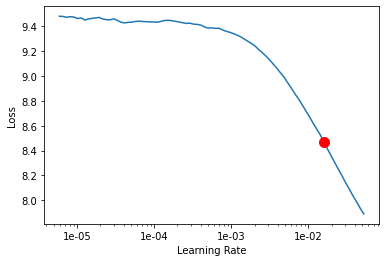

In [11]:
learn.lr_find(start_lr=2e-6, end_lr=1e-1)
learn.recorder.plot(suggestion = True)

In [12]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.960340,5.294291,0.238973,01:06
1,4.120811,4.890740,0.241875,01:06


In [13]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.991118,4.791509,0.245402,01:16
1,3.687629,4.557214,0.261592,01:16
2,3.081622,4.446638,0.276756,01:16


In [14]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-04
Min loss divided by 10: 1.00E-04


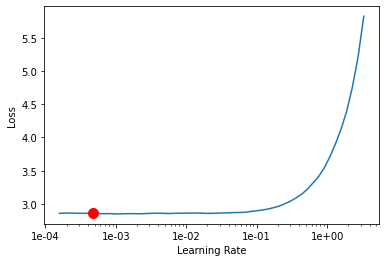

In [15]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [16]:
learn.fit_one_cycle(3, slice(2e-2/(2.6**4), 2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.246835,4.526460,0.270536,01:06
1,3.034893,4.414317,0.279449,01:07
2,2.635046,4.364027,0.286964,01:06


In [17]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 4.79E-05


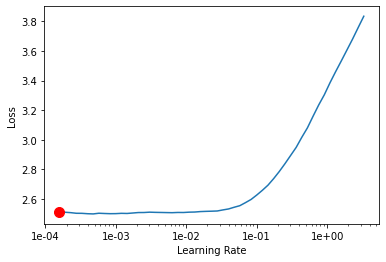

In [18]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [19]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.626888,4.435742,0.287366,01:08
1,2.521906,4.394442,0.294628,01:08
2,2.298498,4.426301,0.296920,01:08


In [20]:
#save the encoder model
learn.save_encoder('my_encoder')

In [21]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (83446 items)
x: TextList
xxbos movie vara level la xxmaj erika poguthu,xxbos i love xxmaj ajith xxmaj kumar xxmaj vivegam movie inki xxunk bht achi lgi,xxbos xxmaj padam nalla comedy padama irukum polaye ..,xxbos karthick subburaj anne xxrep 4 . intha padam vetri adaya xxunk ennudaya valthukkal ...,xxbos கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁
y: CategoryList
0,5,0,0,0
Path: .;

Valid: LabelList (4392 items)
x: TextList
xxbos xxunk epo trailer pathutu irken ... xxmaj semaya iruku,xxbos xxmaj paka thana poro movie la xxmaj enna irukunu,xxbos “ u kena tunggu lebih lama lagi untuk tahu saya ” - chiyaan xxunk,xxbos xxmaj suriya anna vera level anna mass,xxbos suma xxunk da sound over a pooda kudaathu pa s3 1 month oda stop xxunk then bairavaa da xxunk than kaththi kaththi xxunk xxunk pa
y: CategoryList
0,0,5,0,4
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedd

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 3.02E-02


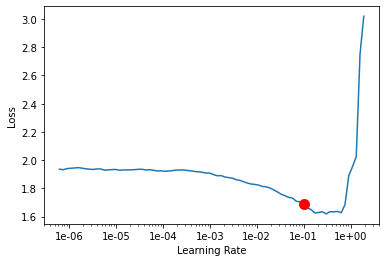

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [24]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.759133,0.748250,0.754098,0.306446,00:33
1,0.760159,0.719311,0.758880,0.000000,00:34
2,0.731942,0.709789,0.758880,0.000000,00:36


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

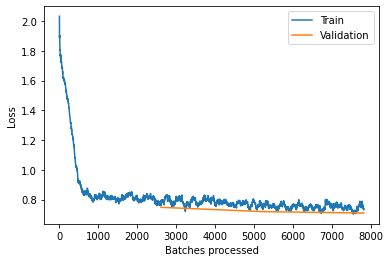

In [25]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 8.32E-05


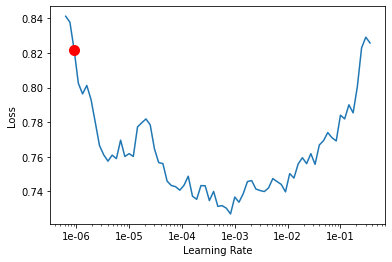

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.745653,0.709756,0.753415,0.406412,00:42
1,0.669904,0.673734,0.764572,0.000000,00:43


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 9.12E-08


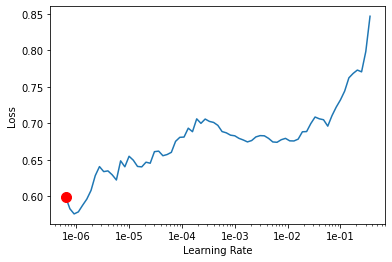

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.636413,0.673782,0.771630,0.409673,01:01
1,0.598237,0.656710,0.775273,0.000000,01:01


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [30]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.602872,0.662712,0.774590,0.432432,01:24
1,0.523616,0.640587,0.775729,0.000000,01:26


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.569761,0.662836,0.773452,0.447800,01:34
1,0.504423,0.657166,0.773224,0.000000,01:34


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.458335,0.670531,0.775046,0.465895,01:33
1,0.419297,0.670779,0.774818,0.000000,01:37
2,0.396507,0.672558,0.771858,0.000000,01:37


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [31]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [32]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,2962,137,139,40,196,29
1,55,76,33,14,27,1
2,72,29,110,4,28,0
4,81,45,33,13,114,2
5,20,1,0,0,3,128


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[2962  137  139   40  196   29]
 [  55   76   33   14   27    1]
 [  72   29  110    4   28    0]
 [   0    0    0    0    0    0]
 [  81   45   33   13  114    2]
 [  20    1    0    0    3  128]]
0.7718579234972678


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.9285    0.8456    0.8851      3503
           1     0.2639    0.3689    0.3077       206
           2     0.3492    0.4527    0.3943       243
           3     0.0000    0.0000    0.0000         0
           4     0.3098    0.3958    0.3476       288
           5     0.8000    0.8421    0.8205       152

    accuracy                         0.7719      4392
   macro avg     0.4419    0.4842    0.4592      4392
weighted avg     0.8203    0.7719    0.7934      4392

